In [137]:
import pandas as pd


In [138]:
file_path = 'data/HeartStepsV1-main/data_files/suggestions.csv'
columns_to_include = [
    'user.index', 'decision.index.nogap', 'avail', 'sugg.decision.utime','sugg.response.utime', 'sugg.device.since', 
    'interaction.count', 'send', 'send.sedentary', 'send.active', 'recognized.activity', 
    'tag.active', 'tag.indoor', 'tag.outdoor', 'tag.outdoor_snow', 'front.end.application', 
    'dec.location.category', 'dec.weather.condition', 'dec.temperature', 'dec.windspeed', 
    'dec.precipitation.chance', 'dec.snow', 'jbsteps30', 'jbmins30', 'jbsteps60', 'jbmins60', "jbsteps120", "jbmins120", 'response'
]

# Load the dataset with the specified columns and filter where 'Send' is True
suggestions_df = pd.read_csv(file_path, usecols=columns_to_include)

/var/folders/qc/46z_x3td2l55q77fsffm737h0000gn/T/ipykernel_35506/1536662843.py:11: DtypeWarning: Columns (21,22,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  suggestions_df = pd.read_csv(file_path, usecols=columns_to_include)


In [139]:
import numpy as np

# Ensure 'sugg.decision.utime' is in datetime format
suggestions_df['sugg.decision.utime'] = pd.to_datetime(suggestions_df['sugg.decision.utime'])



# Step 1: Find rows where both 'dec.weather.condition' and 'dec.temperature' are NaN
rows_to_impute = suggestions_df[suggestions_df['dec.snow'].isna() & suggestions_df['dec.temperature'].isna()]

# Step 2: Impute missing values by finding the closest match
for idx, row in rows_to_impute.iterrows():
    user_id = row['user.index']
    decision_time = row['sugg.decision.utime']

    # Find rows from the same user that have non-NaN values for both weather and temperature
    potential_matches = suggestions_df[
        (suggestions_df['user.index'] == user_id) &
        (~suggestions_df['dec.snow'].isna()) &
        (~suggestions_df['dec.temperature'].isna())
    ]

    # Filter by rows within 6 hours of the current row's decision time
    time_difference = np.abs(potential_matches['sugg.decision.utime'] - decision_time)
    within_time_window = potential_matches[time_difference <= pd.Timedelta(hours=6)]

    if not within_time_window.empty:
        # Find the row with the smallest time difference
        closest_row = within_time_window.loc[time_difference.idxmin()]
        print(closest_row["sugg.decision.utime"], decision_time, closest_row["user.index"], user_id)

        # Step 3: Impute the missing values with those from the closest row
        suggestions_df.at[idx, 'dec.snow'] = closest_row['dec.snow']
        suggestions_df.at[idx, 'dec.temperature'] = closest_row['dec.temperature']

# Now, the missing values for 'dec.weather.condition' and 'dec.temperature' should be imputed where possible


2015-08-30 21:31:00 2015-08-30 23:31:30 1 1
2015-07-24 17:01:56 2015-07-24 19:01:30 2 2
2015-07-25 12:31:44 2015-07-25 17:01:30 2 2
2015-07-25 17:01:30 2015-07-25 19:01:30 2 2
2015-07-28 22:01:20 2015-07-29 00:31:30 2 2
2015-07-31 00:32:02 2015-07-30 22:01:30 2 2
2015-07-31 12:34:48 2015-07-31 17:01:30 2 2
2015-07-31 17:01:30 2015-07-31 19:01:30 2 2
2015-08-01 17:01:32 2015-08-01 12:31:30 2 2
2015-08-02 19:00:57 2015-08-02 17:01:30 2 2
2015-08-03 22:02:22 2015-08-03 17:01:30 2 2
2015-08-03 17:01:30 2015-08-03 19:01:30 2 2
2015-08-03 22:02:22 2015-08-04 00:31:30 2 2
2015-08-06 17:01:31 2015-08-06 13:31:30 2 2
2015-08-07 00:33:29 2015-08-06 22:01:30 2 2
2015-08-07 19:02:47 2015-08-07 17:01:30 2 2
2015-08-08 19:02:42 2015-08-08 17:01:30 2 2
2015-08-12 00:32:05 2015-08-11 22:01:30 2 2
2015-08-12 17:01:19 2015-08-12 19:01:30 2 2
2015-08-15 00:31:05 2015-08-14 22:01:30 2 2
2015-08-15 19:01:43 2015-08-15 17:01:30 2 2
2015-08-17 19:01:15 2015-08-17 17:01:30 2 2
2015-08-17 19:01:15 2015-08-17 2

In [140]:
suggestions_df

,user.index,decision.index.nogap,sugg.decision.utime,sugg.response.utime,sugg.device.since,interaction.count,avail,send,send.active,send.sedentary,...,dec.temperature,dec.windspeed,dec.precipitation.chance,dec.snow,jbmins30,jbsteps30,jbmins60,jbsteps60,jbmins120,jbsteps120
0,1,0.0,2015-07-22 16:31:53,2015-07-22 16:56:35,1.250556,0.0,True,True,False,True,...,23.3,3.0,0.0,0.0,17.0,1311.0,19.0,1413.0,33.0,2035.0
1,1,1.0,2015-07-22 18:32:10,2015-07-22 18:32:38,0.101667,0.0,True,True,True,False,...,24.4,1.6,0.0,0.0,5.0,414.0,5.0,414.0,16.0,1085.0
2,1,2.0,2015-07-22 21:31:48,NaN,0.021667,NaN,True,False,False,False,...,25.8,3.7,0.0,0.0,11.0,341.0,17.0,473.0,61.0,4648.0
3,1,3.0,2015-07-22 23:31:50,NaN,0.103056,NaN,True,True,False,True,...,25.7,0.0,0.0,0.0,7.0,369.0,14.0,715.0,35.0,1480.0
4,1,4.0,2015-07-23 09:31:31,NaN,7.062222,NaN,True,False,False,False,...,11.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8269,37,225.0,2016-01-26 00:03:36,NaN,3.217222,NaN,True,False,False,False,...,3.9,4.0,11.0,0.0,1.0,19.0,4.0,100.0,5.0,142.0
8270,37,226.0,2016-01-26 13:01:04,NaN,16.175000,NaN,False,False,False,False,...,2.2,3.0,15.0,0.0,9.0,564.0,13.0,653.0,25.0,1110.0
8271,37,227.0,2016-01-26 16:27:50,NaN,2.471111,NaN,True,True,True,False,...,1.0,2.4,15.0,0.0,2.0,47.0,12.0,456.0,17.0,737.0
8272,37,228.0,2016-01-26 19:02:09,2016-01-26 19:35:38,0.943611,0.0,True,True,False,True,...,0.1,6.9,15.0,0.0,1.0,29.0,1.0,29.0,11.0,479.0


In [141]:
import numpy as np

# Ensure 'sugg.decision.utime' is in datetime format
suggestions_df['sugg.decision.utime'] = pd.to_datetime(suggestions_df['sugg.decision.utime'])

# Step 1: Find rows where both 'dec.weather.condition' and 'dec.temperature' are NaN
rows_to_impute = suggestions_df[suggestions_df['dec.weather.condition'].isna()]

# Step 2: Impute missing values by finding the closest match
for idx, row in rows_to_impute.iterrows():
    user_id = row['user.index']
    decision_time = row['sugg.decision.utime']

    # Find rows from the same user that have non-NaN values for both weather and temperature
    potential_matches = suggestions_df[
        (suggestions_df['user.index'] == user_id) &
        (~suggestions_df['dec.weather.condition'].isna()) 
    ]

    # Filter by rows within 6 hours of the current row's decision time
    time_difference = np.abs(potential_matches['sugg.decision.utime'] - decision_time)
    within_time_window = potential_matches[time_difference <= pd.Timedelta(hours=6)]

    if not within_time_window.empty:
        # Find the row with the smallest time difference
        closest_row = within_time_window.loc[time_difference.idxmin()]
        print(closest_row["sugg.decision.utime"], decision_time, closest_row["user.index"], user_id)

        # Step 3: Impute the missing values with those from the closest row
        suggestions_df.at[idx, 'dec.weather.condition'] = closest_row['dec.weather.condition']

# Now, the missing values for 'dec.weather.condition' and 'dec.temperature' should be imputed where possible


2015-08-30 21:31:00 2015-08-30 23:31:30 1 1
2015-07-24 17:01:56 2015-07-24 19:01:30 2 2
2015-07-25 12:31:44 2015-07-25 17:01:30 2 2
2015-07-25 17:01:30 2015-07-25 19:01:30 2 2
2015-07-28 22:01:20 2015-07-29 00:31:30 2 2
2015-07-31 00:32:02 2015-07-30 22:01:30 2 2
2015-07-31 12:34:48 2015-07-31 17:01:30 2 2
2015-07-31 17:01:30 2015-07-31 19:01:30 2 2
2015-08-01 17:01:32 2015-08-01 12:31:30 2 2
2015-08-02 19:00:57 2015-08-02 17:01:30 2 2
2015-08-03 00:32:56 2015-08-02 22:03:20 2 2
2015-08-03 22:02:22 2015-08-03 17:01:30 2 2
2015-08-03 17:01:30 2015-08-03 19:01:30 2 2
2015-08-03 22:02:22 2015-08-04 00:31:30 2 2
2015-08-06 17:01:31 2015-08-06 13:31:30 2 2
2015-08-07 00:33:29 2015-08-06 22:01:30 2 2
2015-08-07 19:02:47 2015-08-07 17:01:30 2 2
2015-08-08 19:02:42 2015-08-08 17:01:30 2 2
2015-08-12 00:32:05 2015-08-11 22:01:30 2 2
2015-08-12 17:01:19 2015-08-12 19:01:30 2 2
2015-08-15 00:31:05 2015-08-14 22:01:30 2 2
2015-08-15 19:01:43 2015-08-15 17:01:30 2 2
2015-08-17 19:01:15 2015-08-17 1

In [142]:
suggestions_df.dropna(subset=["decision.index.nogap"], inplace=True)

In [143]:
suggestions_df = suggestions_df[~(suggestions_df["decision.index.nogap"] > 42 * 5)]

In [144]:
suggestions_df = suggestions_df[~(suggestions_df["avail"] == False)]

In [145]:
nan_report = suggestions_df.isna().sum()
nan_report = nan_report[nan_report > 0]  # Only show columns with NaN values

if not nan_report.empty:
    print("Columns with NaN values and their counts:")
    print(nan_report)

    # For each column with NaN values, print the indices of the rows where NaN is present
    for column in nan_report.index:
        nan_indices = suggestions_df[suggestions_df[column].isna()].index.tolist()
        print(f"Indices with NaN in {column}: {nan_indices}")
else:
    print("No NaN values remaining in the dataset.")

Columns with NaN values and their counts:
sugg.response.utime      3313
sugg.device.since        1636
interaction.count        3313
send.active                 1
send.sedentary              1
tag.active               2261
tag.indoor               2261
tag.outdoor              2261
tag.outdoor_snow         2261
front.end.application    4951
response                 3313
dec.weather.condition       3
dec.temperature            37
dec.snow                   37
jbmins30                  565
jbsteps30                 565
jbmins60                  565
jbsteps60                 565
jbmins120                 565
jbsteps120                565
dtype: int64
Indices with NaN in sugg.response.utime: [2, 3, 4, 8, 9, 13, 17, 23, 24, 25, 27, 33, 34, 38, 39, 47, 50, 51, 53, 56, 57, 58, 61, 65, 66, 67, 69, 70, 72, 73, 74, 76, 84, 86, 88, 90, 93, 96, 97, 98, 100, 102, 103, 204, 206, 207, 209, 210, 216, 217, 218, 220, 222, 223, 224, 225, 226, 229, 230, 233, 235, 236, 237, 238, 240, 241, 242, 243, 246, 248

In [146]:
filtered_suggestions_df = suggestions_df[suggestions_df['send'] == True]
unsent_suggestions_df = (suggestions_df[suggestions_df['send'] == False])
unsent_suggestions_df = (unsent_suggestions_df[unsent_suggestions_df['avail'] == True])
filtered_suggestions_df.shape, unsent_suggestions_df.shape

((3642, 29), (2495, 29))

In [147]:
# Step 2: Handle missing sugg.response.utime by replacing with a placeholder and adjusting related columns
placeholder_response_time = "No Response"  # Define a placeholder value

# Ensure that when sugg.response.utime is NaN, interaction.count and response are NaN as well
missing_response = suggestions_df['sugg.response.utime'].isna() & suggestions_df['interaction.count'].isna() & suggestions_df['response'].isna()

# Replace NaN in sugg.response.utime with placeholder, set interaction.count to -1, and response to "No Response"
filtered_suggestions_df.loc[missing_response, 'sugg.response.utime'] = placeholder_response_time
filtered_suggestions_df.loc[missing_response, 'interaction.count'] = -1
filtered_suggestions_df.loc[missing_response, 'response'] = "No Response"


In [148]:
placeholder_response_time = "Unknown"  # Define a placeholder value

# Ensure that when sugg.response.utime is NaN, interaction.count and response are NaN as well
missing_response = suggestions_df['sugg.response.utime'].isna() & suggestions_df['interaction.count'].isna() & suggestions_df['response'].isna()

# Replace NaN in sugg.response.utime with placeholder, set interaction.count to -1, and response to "No Response"
filtered_suggestions_df.loc[missing_response, 'sugg.response.utime'] = placeholder_response_time
filtered_suggestions_df.loc[missing_response, 'interaction.count'] = -1
filtered_suggestions_df.loc[missing_response, 'response'] = "No Response"


In [149]:
res = ["com.google.appengine.labs.repackaged.org.json.JSONObject.<init>(JSONObject.java:179)", "com.google.appengine.labs.repackaged.org.json.JSONObject.getJSONObject(JSONObject.java:516)"]

def clean_weather_conditions(value):
    if value in res:
        return None
    else:
        return value
filtered_suggestions_df.loc[:, "dec.weather.condition"] = filtered_suggestions_df["dec.weather.condition"].apply(clean_weather_conditions)
unsent_suggestions_df.loc[:, "dec.weather.condition"] = unsent_suggestions_df["dec.weather.condition"].apply(clean_weather_conditions)
filtered_suggestions_df.shape

(3642, 29)

In [150]:
missing_response = suggestions_df['sugg.device.since'].isna()

# Replace NaN in sugg.device.utime with placeholder, set sugg.device.since to 0
filtered_suggestions_df.loc[missing_response, 'sugg.device.since'] = 0

In [151]:
# Step 3: Drop rows where interaction.count or response are still NaN
filtered_suggestions_df = filtered_suggestions_df.dropna(subset=['interaction.count', 'response'])
filtered_suggestions_df.dropna(subset=['jbmins60'])

filtered_suggestions_df.shape

(3642, 29)

In [152]:
# Step 4: Delete the column 'send'
filtered_suggestions_df = filtered_suggestions_df.drop(columns=['send', "avail"])
filtered_suggestions_df = filtered_suggestions_df.dropna(subset=['send.active'])
filtered_suggestions_df.shape


(3641, 27)

In [156]:
# Step 3: Drop rows where interaction.count or response are still NaN
filtered_suggestions_df = filtered_suggestions_df.dropna(subset=['interaction.count', 'response'])
filtered_suggestions_df = filtered_suggestions_df.dropna(subset=['jbmins60'])

filtered_suggestions_df.shape

(3301, 28)

In [157]:
filtered_suggestions_df['front.end.application'] = filtered_suggestions_df['front.end.application'].fillna("OFF")
filtered_suggestions_df.shape

(3301, 28)

In [158]:
# Step 6: Create a new 'Time of Day' column from sugg.decision.utime
filtered_suggestions_df['sugg.decision.utime'] = pd.to_datetime(filtered_suggestions_df['sugg.decision.utime'])
filtered_suggestions_df['Time of Day'] = filtered_suggestions_df['sugg.decision.utime'].dt.time
unsent_suggestions_df['Time of Day'] = unsent_suggestions_df['sugg.decision.utime'].dt.time


In [159]:
nan_report = filtered_suggestions_df.isna().sum()
nan_report = nan_report[nan_report > 0]  # Only show columns with NaN values

if not nan_report.empty:
    print("Columns with NaN values and their counts:")
    print(nan_report)

    # For each column with NaN values, print the indices of the rows where NaN is present
    for column in nan_report.index:
        nan_indices = filtered_suggestions_df[filtered_suggestions_df[column].isna()].index.tolist()
        print(f"Indices with NaN in {column}: {nan_indices}")
else:
    print("No NaN values remaining in the dataset.")

Columns with NaN values and their counts:
dec.weather.condition     3
dec.temperature          20
dec.snow                 20
dtype: int64
Indices with NaN in dec.weather.condition: [3886, 4186, 5075]
Indices with NaN in dec.temperature: [1544, 1564, 1565, 1567, 1568, 1570, 1571, 1573, 1577, 1578, 1595, 1596, 1597, 3546, 3767, 3769, 3770, 3802, 3803, 3805]
Indices with NaN in dec.snow: [1544, 1564, 1565, 1567, 1568, 1570, 1571, 1573, 1577, 1578, 1595, 1596, 1597, 3546, 3767, 3769, 3770, 3802, 3803, 3805]


In [160]:
filtered_suggestions_df.to_csv("data/modified_data/Cleaned Dataset_V2.csv")

In [161]:
nan_report = unsent_suggestions_df.isna().sum()
nan_report = nan_report[nan_report > 0]  # Only show columns with NaN values

if not nan_report.empty:
    print("Columns with NaN values and their counts:")
    print(nan_report)

    # For each column with NaN values, print the indices of the rows where NaN is present
    for column in nan_report.index:
        nan_indices = filtered_suggestions_df[filtered_suggestions_df[column].isna()].index.tolist()
        print(f"Indices with NaN in {column}: {nan_indices}")
else:
    print("No NaN values remaining in the dataset.")

Columns with NaN values and their counts:
sugg.response.utime      2495
sugg.device.since         660
interaction.count        2495
tag.active               2260
tag.indoor               2260
tag.outdoor              2260
tag.outdoor_snow         2260
front.end.application    1990
response                 2495
dec.weather.condition       5
dec.temperature            16
dec.snow                   16
jbmins30                  225
jbsteps30                 225
jbmins60                  225
jbsteps60                 225
jbmins120                 225
jbsteps120                225
dtype: int64
Indices with NaN in sugg.response.utime: []
Indices with NaN in sugg.device.since: []
Indices with NaN in interaction.count: []
Indices with NaN in tag.active: []
Indices with NaN in tag.indoor: []
Indices with NaN in tag.outdoor: []
Indices with NaN in tag.outdoor_snow: []
Indices with NaN in front.end.application: []
Indices with NaN in response: []
Indices with NaN in dec.weather.condition: [3886, 4

In [162]:
unsent_suggestions_df

,user.index,decision.index.nogap,sugg.decision.utime,sugg.response.utime,sugg.device.since,interaction.count,avail,send,send.active,send.sedentary,...,dec.windspeed,dec.precipitation.chance,dec.snow,jbmins30,jbsteps30,jbmins60,jbsteps60,jbmins120,jbsteps120,Time of Day
2,1,2.0,2015-07-22 21:31:48,NaN,0.021667,NaN,True,False,False,False,...,3.7,0.0,0.0,11.0,341.0,17.0,473.0,61.0,4648.0,21:31:48
4,1,4.0,2015-07-23 09:31:31,NaN,7.062222,NaN,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,09:31:31
8,1,8.0,2015-07-23 23:32:54,NaN,0.266111,NaN,True,False,False,False,...,0.0,0.0,0.0,9.0,386.0,17.0,743.0,19.0,783.0,23:32:54
9,1,9.0,2015-07-24 09:31:49,NaN,6.012500,NaN,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,79.0,09:31:49
13,1,13.0,2015-07-24 23:31:40,NaN,0.047222,NaN,True,False,False,False,...,3.7,0.0,0.0,11.0,447.0,19.0,663.0,47.0,2539.0,23:31:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,37,199.0,2016-01-20 22:30:45,NaN,6.391111,NaN,True,False,False,False,...,0.0,0.0,0.0,1.0,29.0,10.0,297.0,10.0,297.0,22:30:45
8246,37,202.0,2016-01-21 16:27:30,NaN,0.040833,NaN,True,False,False,False,...,0.0,0.0,0.0,5.0,220.0,10.0,430.0,19.0,875.0,16:27:30
8247,37,203.0,2016-01-21 19:03:21,NaN,0.360833,NaN,True,False,False,False,...,6.0,0.0,0.0,8.0,185.0,9.0,209.0,11.0,249.0,19:03:21
8251,37,207.0,2016-01-22 16:29:26,NaN,15.320278,NaN,True,False,False,False,...,5.9,-1.0,-1.0,8.0,287.0,17.0,682.0,26.0,1188.0,16:29:26


In [163]:
unsent_suggestions_df.drop(columns=['sugg.response.utime', "send", "send.active", "send.sedentary", "interaction.count", "tag.active", "tag.indoor", "tag.outdoor", "tag.outdoor_snow", "front.end.application", "response", "avail"], inplace=True)


In [164]:
unsent_suggestions_df.dropna(subset=['jbmins60'], inplace=True)


In [165]:
unsent_suggestions_df

,user.index,decision.index.nogap,sugg.decision.utime,sugg.device.since,recognized.activity,dec.location.category,dec.weather.condition,dec.temperature,dec.windspeed,dec.precipitation.chance,dec.snow,jbmins30,jbsteps30,jbmins60,jbsteps60,jbmins120,jbsteps120,Time of Day
2,1,2.0,2015-07-22 21:31:48,0.021667,STILL,home,Mostly Cloudy,25.8,3.7,0.0,0.0,11.0,341.0,17.0,473.0,61.0,4648.0,21:31:48
4,1,4.0,2015-07-23 09:31:31,7.062222,STILL,home,Clear,11.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,09:31:31
8,1,8.0,2015-07-23 23:32:54,0.266111,STILL,home,Partly Cloudy,27.5,0.0,0.0,0.0,9.0,386.0,17.0,743.0,19.0,783.0,23:32:54
9,1,9.0,2015-07-24 09:31:49,6.012500,STILL,home,Clear,16.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,79.0,09:31:49
13,1,13.0,2015-07-24 23:31:40,0.047222,STILL,home,Clear,32.1,3.7,0.0,0.0,11.0,447.0,19.0,663.0,47.0,2539.0,23:31:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,37,199.0,2016-01-20 22:30:45,6.391111,STILL,home,Overcast,-7.0,0.0,0.0,0.0,1.0,29.0,10.0,297.0,10.0,297.0,22:30:45
8246,37,202.0,2016-01-21 16:27:30,0.040833,STILL,work,Overcast,-4.4,0.0,0.0,0.0,5.0,220.0,10.0,430.0,19.0,875.0,16:27:30
8247,37,203.0,2016-01-21 19:03:21,0.360833,STILL,work,Overcast,-3.9,6.0,0.0,0.0,8.0,185.0,9.0,209.0,11.0,249.0,19:03:21
8251,37,207.0,2016-01-22 16:29:26,15.320278,STILL,work,Partly Cloudy,-2.3,5.9,-1.0,-1.0,8.0,287.0,17.0,682.0,26.0,1188.0,16:29:26


In [166]:
nan_report = unsent_suggestions_df.isna().sum()
nan_report = nan_report[nan_report > 0]  # Only show columns with NaN values

if not nan_report.empty:
    print("Columns with NaN values and their counts:")
    print(nan_report)

    # For each column with NaN values, print the indices of the rows where NaN is present
    for column in nan_report.index:
        nan_indices = filtered_suggestions_df[filtered_suggestions_df[column].isna()].index.tolist()
        print(f"Indices with NaN in {column}: {nan_indices}")
else:
    print("No NaN values remaining in the dataset.")

Columns with NaN values and their counts:
sugg.device.since        561
dec.weather.condition      5
dec.temperature           15
dec.snow                  15
dtype: int64
Indices with NaN in sugg.device.since: []
Indices with NaN in dec.weather.condition: [3886, 4186, 5075]
Indices with NaN in dec.temperature: [1544, 1564, 1565, 1567, 1568, 1570, 1571, 1573, 1577, 1578, 1595, 1596, 1597, 3546, 3767, 3769, 3770, 3802, 3803, 3805]
Indices with NaN in dec.snow: [1544, 1564, 1565, 1567, 1568, 1570, 1571, 1573, 1577, 1578, 1595, 1596, 1597, 3546, 3767, 3769, 3770, 3802, 3803, 3805]


In [167]:
unsent_suggestions_df.to_csv("data/modified_data/Cleaned Unsent Dataset_V2.csv")

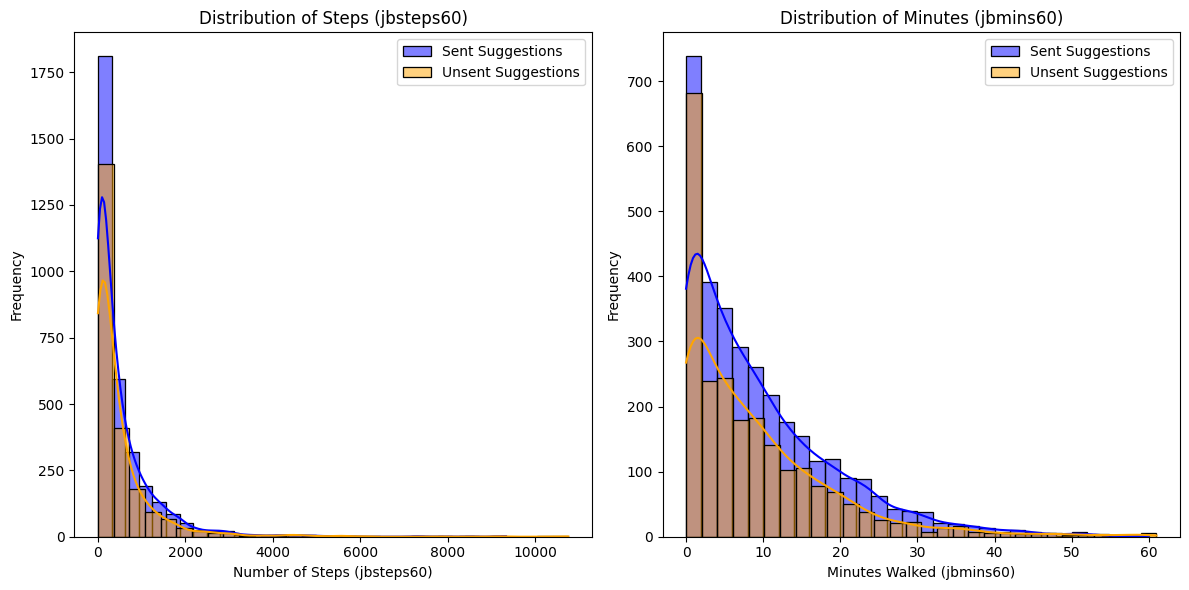

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `unsent_suggestions_df` is already loaded alongside `filtered_suggestion_df`

# Step 1: Plot the distribution of jbsteps60 for both sent and unsent suggestions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Distribution of steps (jbsteps60)
sns.histplot(filtered_suggestions_df['jbsteps60'], bins=30, kde=True, color='blue', ax=axes[0], label='Sent Suggestions')
sns.histplot(unsent_suggestions_df['jbsteps60'], bins=30, kde=True, color='orange', ax=axes[0], label='Unsent Suggestions')
axes[0].set_title('Distribution of Steps (jbsteps60)')
axes[0].set_xlabel('Number of Steps (jbsteps60)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Step 2: Plot the distribution of jbmins60 for both sent and unsent suggestions
sns.histplot(filtered_suggestions_df['jbmins60'], bins=30, kde=True, color='blue', ax=axes[1], label='Sent Suggestions')
sns.histplot(unsent_suggestions_df['jbmins60'], bins=30, kde=True, color='orange', ax=axes[1], label='Unsent Suggestions')
axes[1].set_title('Distribution of Minutes (jbmins60)')
axes[1].set_xlabel('Minutes Walked (jbmins60)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()
